In [10]:
import math
import numpy as np
import scipy.optimize as opt
from LinApp_Deriv import LinApp_Deriv as deriv
from LinApp_FindSS import LinApp_FindSS as findss
from LinApp_Solve import LinApp_Solve as solve
from rouwen import rouwen
from numba import jit
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Problem 1

In [4]:
# Parameters
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02
num = 26
sizek = num
sizez = num

In [6]:
# Create discrete grid for k
A = alpha*beta
kbar = A**(1/(1-alpha))
kmax = 1.5*kbar
kmin = 0.5*kbar
kgrid = np.linspace(kmin,kmax,sizek)

# Create grid for z 
zmax = 5*sigma
zmin = -5*sigma
mu = (zmax+zmin)/2
step = (zmax-zmin)/(sizez-1)
pi, zgrid = rouwen(rho,mu,step,sizez)

In [22]:
g = alpha+(1/(alpha*beta))
l = (alpha*beta)**(alpha/(1-alpha))
P = 0.5*(g+np.sqrt(g**2+4/beta))
Q = (rho*l+1/beta)/(rho+P-g)

# Defining the policy function 
opt_K = np.zeros((sizek,sizez))
for k in range(sizez):
    opt_K[:,k] = kbar+P*(kgrid-kbar)+Q*zgrid[k]

opt_K_actual = np.zeros((sizek,sizez))

for k in range(sizez):
    opt_K_actual[:,k] = A*np.exp(zgrid[k])*(kgrid**alpha)

<IPython.core.display.Javascript object>


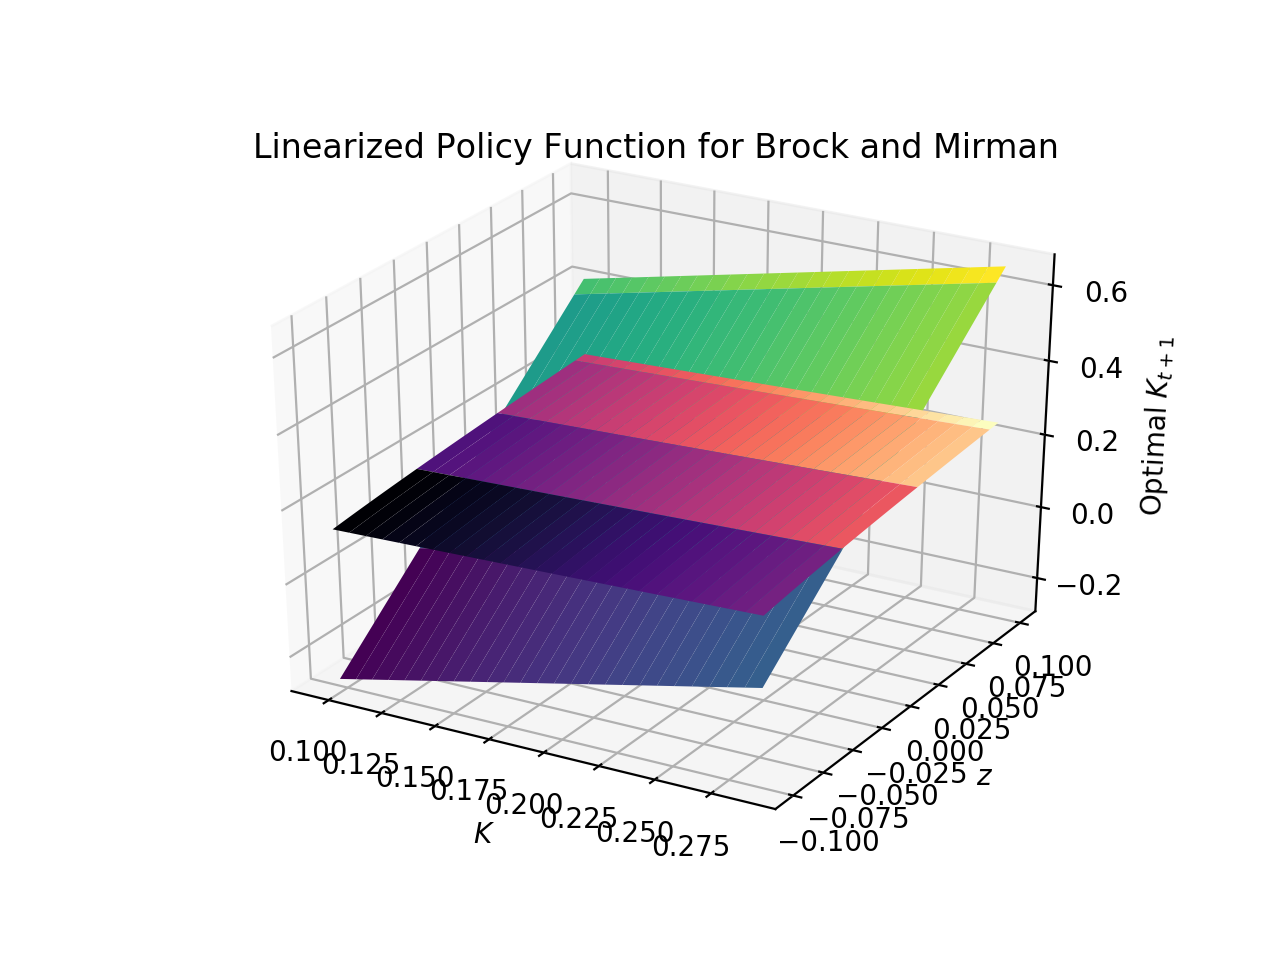

In [26]:
# Plot optimal capital stock rule as a function of firm size
kmat, zmat = np.meshgrid(kgrid,zgrid)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(kmat, zmat, opt_K, rstride=8,
                cstride=1, cmap='viridis')
ax.plot_surface(kmat, zmat, opt_K_actual, rstride=8,
                cstride=1, cmap='magma')
ax.set_title('Linearized Policy Function for Brock and Mirman')
ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$z$')
ax.set_zlabel(r'Optimal $K_{t+1}$')
plt.savefig('Brock_and_Merman_linearized_policy')
plt.show()

# Problem 4

In [28]:
# Parameters
gamma = 2.5
xi = 1.5
beta = 0.98
alpha = 0.40
a = 0.5
delta = 0.10
z_bar = 0
rho_z = 0.9
tau = 0.05

In [33]:
def euler_eqns_2(x, *args):
    gamma, xi, beta, alpha, a, delta, z_bar, tau = args
    k = x[0]
    l = x[1]
    r = alpha*((l*np.exp(z_bar)/k)**(1-alpha))
    w = (1-alpha)*np.exp(z_bar)*((k/(l*np.exp(z_bar)))**alpha)
    c = w*l+(r-delta)*k
    euler = np.zeros(2)
    euler[0] = (c**(-gamma))-beta*(c**(-gamma))*((1-tau)*(r-delta)+1)
    euler[1] = w*(1-tau)*(c**(-gamma))-a*((1-l)**(-xi))
    return euler

x_init2 = np.array([5,0.8])
args2 = gamma, xi, beta, alpha, a, delta, z_bar, tau
ans = opt.fsolve(euler_eqns_2,x_init2,args=args2)
k = ans[0]
l = ans[1]
y = (k**alpha)*(((np.exp(z_bar)*l)**(1-alpha)))
i = delta*k
r = alpha*((l*np.exp(z_bar)/k)**(1-alpha))
w = (1-alpha)*np.exp(z_bar)*((k/(l*np.exp(z_bar)))**alpha)
c = w*l+(r-delta)*k
T = tau*c
print('Steady State Values:')
print('k:', k, 'l:', l, 'r:', r, 'w:', w, 'c:', c, 'T:', T,'y:', y, 'i:', i)

Steady State Values:
k: 4.22522903493 l: 0.579791453146 r: 0.121482276978 w: 1.32795276939 c: 0.860703206301 T: 0.0430351603151 y: 1.28322610979 i: 0.422522903493


# Problem 5